In [63]:
! pip install scikit-fuzzy

^C



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
import pandas as pd
import skfuzzy as fuzz
from functools import partial

In [21]:
def distance_weighted(x,y,mu, eps = 1e-3):
    if np.abs(np.sum(mu)-1) > eps:
        raise ValueError('mu must sum to 1')
    return np.sum(np.array(mu)*(x-y)**2)

### Preprocessing

In [1]:
import pandas as pd
train_data = pd.read_csv('BATADAL_dataset04.csv')

In [3]:
train_data[" ATT_FLAG"].value_counts()
df_np_label = train_data.drop(["DATETIME", " ATT_FLAG"], axis=1).values


In [60]:
def generate_subsequences(data, window_size, step_size):
    num_points, num_variables = data.shape
    number_subs = int((num_points - window_size)/step_size) + 1  # Number of subsequences

    subsequences = np.zeros((number_subs, window_size, num_variables))

    for i in range(number_subs):
        subsequences[i, :, :] = data[i*step_size:i*step_size+window_size, :]
    return subsequences

def reconstructed_loss(reconstructed_points, initial_points):
    return np.linalg.norm(reconstructed_points - initial_points, ord=2, axis=1)


In [65]:
window_size = 10
stride = 5
sequences = generate_subsequences(df_np_label, window_size, stride)
label_sequences = generate_subsequences(train_data[" ATT_FLAG"].values.reshape(-1,1), window_size, stride)

In [80]:
data_for_clustering = sequences.reshape(sequences.shape[0], -1)
mu = [1/data_for_clustering.shape[1] for i in range(data_for_clustering.shape[1])]

cntr, u, _, _, _, _, _ = fuzz.cluster.cmeans(data_for_clustering.T, 5, 2,metric = partial(distance_weighted, mu = mu), error=0.005, maxiter=1000, init=None)

# Reconstruction of initial points
reconstructed_points = np.dot(u.T, cntr) / np.sum(u, axis=0)[:, None]



In [82]:
loss = reconstructed_loss(reconstructed_points, data_for_clustering)


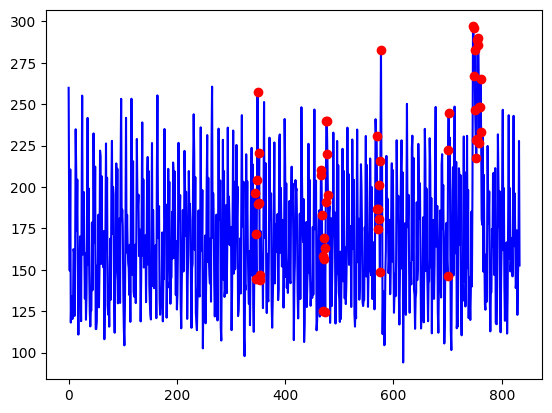

In [83]:
label_reshaped = np.max(label_sequences, axis=1)
# Select points with label 1
label_1_indices = np.where(label_reshaped == 1)[0]

#plot loss
plt.plot(range(len(loss)), loss, color='blue', label='Label 0')

# Plot red points for anomalies
plt.plot(label_1_indices, loss[label_1_indices], 'ro', label='Label 1')


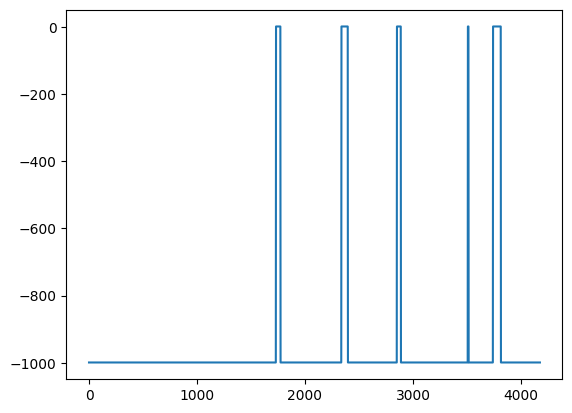

In [73]:
plt.plot(train_data[" ATT_FLAG"].values)